In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATA_PATH = 'C:/Users/MJ/Desktop/MyValue/NLP/Model/data/' #데이터경로 설정
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
    if 'txt' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

파일 크기: 
DATASET.txt                   121.96MB
TESTCASE.txt                  2.26MB
TRAINSET.txt                  112.11MB


In [41]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'TRAINSET.txt', header = 0, delimiter = '\t', quoting=3, encoding='cp949')
train_data.head()

,발화,감정
0,퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.더 좋은 회사가 기다리고 있을지...,3
1,요즘 직장생활이 너무 편하고 좋은 것 같아!우리 회사는 복지가 정말 좋아! 내가 곧...,3
2,취업해야 할 나이인데 취업하고 싶지가 않아.아직 조금 더 놀고 싶은 마음이 커. 인...,3
3,우리 회사는 정말 사내 분위기가 좋아.즐거운 일이 매일 생길 거 같은 기분이야. 내...,3
4,오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.회사에서 내가 제안한 프...,3


In [42]:
print('학습데이터 전체 개수: {}'.format(len(train_data)))

학습데이터 전체 개수: 84098


In [43]:
#리뷰 전체길이 확인
train_length = train_data['발화'].astype(str).apply(len)
train_length.head()

0     65
1     85
2     68
3     71
4    118
Name: 발화, dtype: int64

In [44]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 307
리뷰 길이 최솟값: 2
리뷰 길이 평균값: 74.86
리뷰 길이 표준편차: 43.04
리뷰 길이 중간값: 82.0
리뷰 길이 제1사분위: 30.0
리뷰 길이 제3사분위: 109.0


In [45]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['발화'] if type(review) is str]
train_review

['퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.더 좋은 회사가 기다리고 있을지도 모르는데 쉬고 있기가 좀 그래.',
 '요즘 직장생활이 너무 편하고 좋은 것 같아!우리 회사는 복지가 정말 좋아! 내가 곧 출산하게 되는데 육아휴직 기간도 긴 데다가 소정의 지원금도 제공해줘!',
 '취업해야 할 나이인데 취업하고 싶지가 않아.아직 조금 더 놀고 싶은 마음이 커. 인생은 긴데 꼭 빨리 취업해야 할까 싶어.',
 '우리 회사는 정말 사내 분위기가 좋아.즐거운 일이 매일 생길 거 같은 기분이야. 내가 원하는 진로로 취업해서 더 그런 거 같아.',
 '오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.회사에서 내가 제안한 프로젝트를 항상 긍정적으로 검토해주시고 의견에 귀를 기울여주시거든. 이렇게 서로 존중하면서 소통할 수 있는 우리 회사가 아주 좋아.',
 '회사에서 전공시험을 봤어. 오늘 시험 결과가 나왔어.열심히 준비한 만큼 원하던 점수가 나왔어.',
 '오늘 입사 면접을 봤어.면접을 잘 본 것 같아! 그 회사에 취업할 수 있겠어.',
 '회사에서 나를 참 신뢰하는 것 같아. 그건 기분이 좋아.당연히 내가 업무를 잘 처리해서지. 그런데 내가 잘해선지 일이 자꾸 늘어나네? ',
 '먼저 취업한 선배가 면접 비결을 알려줬어. 곧 면접 보러 가는데 든든해.면접 볼 때 태도 같은 일반적인 거야. 하지만 그렇게 나를 챙겨주는 사람이 있다는 게 든든해.',
 '직장 상사로부터 칭찬을 받았는데 너무 신이 나!다른 사람이 실수한 일을 내가 깔끔하게 처리해서 칭찬을 받았어.',
 '취업해서 너무 신이 나!나는 월급을 받아서 부모님께 용돈을 드리고 싶어!',
 '오늘 사장님께 칭찬받아서 매우 기뻐.전 직원 앞에서 내 이름을 부르셨거든. 앞으로도 일을 열심히 해야겠어.',
 '지난주에 정말 가고 싶던 회사에 원서 접수했는데 합격했어. 매우 기뻐.응. 이제 면접만 합격하면 돼. 열심히 준비해서 꼭 합격할 거야.',
 '나 드디어 원하는 회사에 취업했어!그동안 취업을 못 

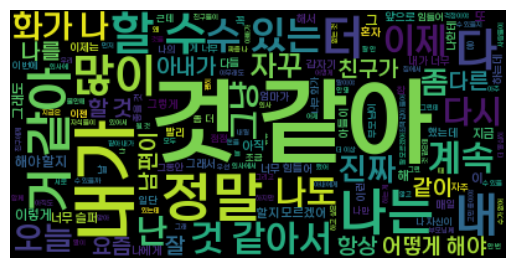

In [46]:
# 데이터에서 많이 나오는 단어들
wordcloud = WordCloud(DATA_PATH+'Tenada.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
# 불안 0, 슬픔 1, 분노 2, 기쁨 3, 중립 4

print('불안 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[0]))
print('슬픔 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[1]))
print('분노 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[2]))
print('기쁨 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[3]))
print('중립 리뷰 갯수: {}'.format(train_data['감정'].value_counts()[4]))

불안 리뷰 갯수: 25480
슬픔 리뷰 갯수: 25291
분노 리뷰 갯수: 15808
기쁨 리뷰 갯수: 12914
중립 리뷰 갯수: 4605


In [48]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

DATA_PATH = 'C:/Users/MJ/Desktop/MyValue/NLP/Model/data/'
train_data = pd.read_csv(DATA_PATH + 'TRAINSET.txt', header = 0, delimiter = '\t', quoting=3, encoding='cp949')

train_data['발화'][:5]

0    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.더 좋은 회사가 기다리고 있을지...
1    요즘 직장생활이 너무 편하고 좋은 것 같아!우리 회사는 복지가 정말 좋아! 내가 곧...
2    취업해야 할 나이인데 취업하고 싶지가 않아.아직 조금 더 놀고 싶은 마음이 커. 인...
3    우리 회사는 정말 사내 분위기가 좋아.즐거운 일이 매일 생길 거 같은 기분이야. 내...
4    오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.회사에서 내가 제안한 프...
Name: 발화, dtype: object

In [49]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
  #함수인자설명
  # review : 전처리할 텍스트
  # okt : okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword : 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words : 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [50]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['발화']:
  # 데이터가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기  

clean_train_review[:4]

[['퇴사',
  '지다',
  '얼마',
  '안',
  '돼다',
  '천천히',
  '직장',
  '을',
  '구',
  '해보다',
  '더',
  '좋다',
  '회사',
  '기다리다',
  '있다',
  '모르다',
  '쉬',
  '고',
  '있다',
  '좀',
  '그렇다'],
 ['요즘',
  '직장',
  '생활',
  '너무',
  '편하다',
  '좋다',
  '같다',
  '회사',
  '복지',
  '정말',
  '좋다',
  '내',
  '곧',
  '출산',
  '하다',
  '되다',
  '육아휴직',
  '기간',
  '도',
  '기다',
  '데',
  '다가',
  '소정',
  '지원',
  '금도',
  '제공',
  '해주다'],
 ['취업',
  '하다',
  '하다',
  '나이',
  '인데',
  '취업',
  '하고',
  '싶다',
  '않다',
  '아직',
  '조금',
  '더',
  '놀다',
  '싶다',
  '마음',
  '크다',
  '인생',
  '기다',
  '꼭',
  '빨리',
  '취업',
  '하다',
  '하다',
  '싶다'],
 ['우리',
  '회사',
  '정말',
  '사내',
  '분위기',
  '좋다',
  '즐겁다',
  '일이',
  '매일',
  '생기다',
  '거',
  '같다',
  '기분',
  '이야',
  '내',
  '원하다',
  '진로',
  '로',
  '취업',
  '하다',
  '더',
  '그렇다',
  '거',
  '같다']]

In [51]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'TESTCASE.txt', header = 0, delimiter='\t', quoting=3, encoding='cp949')

clean_test_review = []
for review in test_data['발화']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

In [52]:
# 수정

# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
from keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['감정'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_label_data = np.array(test_data['감정'])
test_labels = to_categorical(test_label_data, num_classes=5) # 수정할 부분 : 출력 차원

In [53]:
DEFAULT_PATH  = 'C:/Users/MJ/Desktop/MyValue/NLP/Model/data/' # 경로지정
DATA_PATH = 'CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

In [54]:
# 학습 데이터 불러오기
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = 'C:/Users/MJ/Desktop/MyValue/NLP/Model/data/CLEAN_DATA/'
DATA_OUT = 'C:/Users/MJ/Desktop/MyValue/NLP/Model/data/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'), allow_pickle=True)
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'), allow_pickle=True)
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

In [55]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

In [57]:
# 수정

class CNNClassifier(tf.keras.Model):

    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                        kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                                activation = tf.keras.activations.relu,
                                kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=5,  # 수정할 부분 : 출력 차원 변경
                                activation=tf.keras.activations.softmax,  # 활성화 함수 변경
                                kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))

    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x


In [58]:
# 수정

from keras.models import save_model
from keras.utils import to_categorical
from keras.layers import Dense

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

train_label = to_categorical(train_label, num_classes=5)

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name + '\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

save_model(model, 'C:/Users/MJ/Desktop/MyValue/NLP/Model/')


C:/Users/MJ/Desktop/MyValue/NLP/Model/data/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/10
148/148 [==============================] - ETA: 0s - loss: 1.2275 - accuracy: 0.4204
Epoch 1: val_accuracy improved from -inf to 0.05981, saving model to C:/Users/MJ/Desktop/MyValue/NLP/Model/data/DATA_OUT/cnn_classifier_kr\weights.h5
148/148 [==============================] - 12s 70ms/step - loss: 1.2275 - accuracy: 0.4204 - val_loss: 4.9561 - val_accuracy: 0.0598
Epoch 2/10
148/148 [==============================] - ETA: 0s - loss: 1.0154 - accuracy: 0.5510
Epoch 2: val_accuracy improved from 0.05981 to 0.09727, saving model to C:/Users/MJ/Desktop/MyValue/NLP/Model/data/DATA_OUT/cnn_classifier_kr\weights.h5
148/148 [==============================] - 10s 69ms/step - loss: 1.0154 - accuracy: 0.5510 - val_loss: 5.5626 - val_accuracy: 0.0973
Epoch 3/10
148/148 [==============================] - ETA: 0s - loss: 0.9363 - accuracy: 0.5947
Epoch 3: val_accuracy improved from 0.09727 to

INFO:tensorflow:Assets written to: C:/Users/MJ/Desktop/MyValue/NLP/Model/assets


In [59]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('C:/Users/MJ/Desktop/MyValue/NLP/Model/data/DATA_OUT/cnn_classifier_kr/weights.h5')
model.evaluate(test_input, test_label_data)

45/45 [==============================] - 0s 2ms/step - loss: 2.4768 - accuracy: 0.3815


[2.476813554763794, 0.38145047426223755]

In [34]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('C:/Users/MJ/Desktop/MyValue/NLP/Model/data/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('C:/Users/MJ/Desktop/MyValue/NLP/Model/data/DATA_OUT/cnn_classifier_kr/weights.h5') #모델 불러오기
predictions = model.predict(pad_new)

print(predictions)

1/1 [==============================] - 0s 36ms/step
[[0.23158418 0.18418251 0.07209026 0.50727016 0.00487298]
 [0.39011928 0.31786275 0.10000023 0.18552846 0.00648935]
 [0.457689   0.26528922 0.17667568 0.09315685 0.0071893 ]
 [0.3202013  0.3250692  0.09683918 0.24963683 0.00825358]
 [0.3351261  0.30731338 0.10686438 0.2418105  0.00888566]
 [0.47861847 0.2952588  0.1654842  0.05458533 0.00605319]
 [0.31472936 0.22271764 0.12066698 0.33308047 0.00880552]
 [0.10627025 0.79651564 0.05475954 0.04087967 0.00157489]]
